# Datacamp example Classification

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

iris = datasets.load_iris()

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris.filename

'C:\\Users\\RISHAB\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\sklearn\\datasets\\data\\iris.csv'

In [11]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
X = iris.data
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


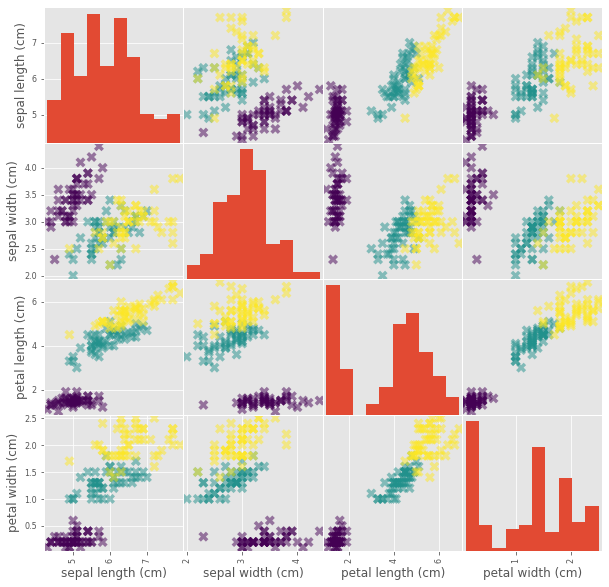

In [28]:
_ = pd.plotting.scatter_matrix(df , c=y , figsize=[10,10] ,s= 100 , marker='X')

# Classification Challenge - k-Nearest Neighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [32]:
print(X.shape , y.shape)

(150, 4) (150,)


In [33]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [35]:
X_new = np.array([[5.7,3.7,2.8,1.9],
                [5.4,3.5,2.1,2],
                [6,4.5,2.8,3.9]])
print(X_new)

[[5.7 3.7 2.8 1.9]
 [5.4 3.5 2.1 2. ]
 [6.  4.5 2.8 3.9]]


In [36]:
knn.predict(X_new)

array([1, 0, 1])

In [37]:
print('Prediction : {}'.format(knn.predict(X_new)))

Prediction : [1 0 1]


# Maesuring model performance

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [56]:
knn = KNeighborsClassifier(n_neighbors = 8)

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [58]:
y_pred = knn.predict(X_test)

In [48]:
knn.score(X_test,y_test)

0.9473684210526315

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      1.00      0.93        13
           2       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.96      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [65]:
k = [0,0,0,0,0,0,0,0,0,0,]

for i in [1,2,3,4,5,6,7,8,9,10]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    k[i-1] = knn.score(X_test,y_test)
    print(knn.score(X_test,y_test) , knn.score(X_train,y_train))  

0.9473684210526315 1.0
0.9210526315789473 0.9821428571428571
0.9736842105263158 0.9553571428571429
0.9736842105263158 0.9642857142857143
0.9736842105263158 0.9732142857142857
0.9473684210526315 0.9732142857142857
0.9473684210526315 0.9732142857142857
0.9473684210526315 0.9732142857142857
0.9736842105263158 0.9732142857142857
0.9736842105263158 0.9732142857142857


In [66]:
print(k)

[0.9473684210526315, 0.9210526315789473, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158]
